# BARATHKUMARJ CB.EN.U4CSE21608


## SUPPORT VECTOR MACHINES

### DATA PREPROCESSING

#### LIBRARIES USED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


#### DATA COLLECTION

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
z=df.columns
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### DATA CLEANING 

In [3]:
df1=df.copy(deep=True)
df1=df1.drop(['id'],axis=1)
y=df1['stroke']
df1=df1.drop(['stroke'],axis=1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [4]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [5]:
print("number of null values in each column")
print(df1.isna().sum())

number of null values in each column
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64


In [6]:
df1=df1.fillna(df1['bmi'].mean())

In [7]:
print("number of null values in each column")
print(df1.isna().sum())

number of null values in each column
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


#### LABEL ENCODING

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'col1' and 'col2' are the columns you want to encode
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['ever_married'] = label_encoder.fit_transform(df1['ever_married'])
df1['Residence_type'] = label_encoder.fit_transform(df1['Residence_type'])
df1['smoking_status'] = label_encoder.fit_transform(df1['smoking_status'])
df1['work_type'] = label_encoder.fit_transform(df1['work_type'])
df1.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [10]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df1


# Obtaining the oversampled dataframes - testing and training
X ,y = oversample.fit_resample(X, y)

no standard scaling because if we want to scale means it would be difficult to give custom inputs

### DATA VISUALISATION //NEEYE PANNIKO MENDOKUSAI DA

### DATA TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)




Training data shape: (6805, 10) (6805,)
Testing data shape: (2917, 10) (2917,)


### MODEL TRANING

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

#### LINEAR

In [ ]:
# Linear SVM
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Linear SVM Accuracy:", linear_accuracy)


Linear SVM Accuracy: 0.7747685978745287


#### POLYNOMIAL

In [14]:
# Polynomial SVM
polynomial_svm = svm.SVC(kernel='poly', degree=3)
polynomial_svm.fit(X_train, y_train)
polynomial_predictions = polynomial_svm.predict(X_test)
polynomial_accuracy = accuracy_score(y_test, polynomial_predictions)
print("Polynomial SVM Accuracy:", polynomial_accuracy)

Polynomial SVM Accuracy: 0.7764826876928351


#### Radial Basis Function

In [15]:
# RBF SVM
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_predictions = rbf_svm.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print("RBF SVM Accuracy:", rbf_accuracy)


RBF SVM Accuracy: 0.7538567020911896


#### Sigmoid SVM: 

In [16]:
# Sigmoid SVM
sigmoid_svm = svm.SVC(kernel='sigmoid', gamma='auto')
sigmoid_svm.fit(X_train, y_train)
sigmoid_predictions = sigmoid_svm.predict(X_test)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_predictions)
print("Sigmoid SVM Accuracy:", sigmoid_accuracy)

Sigmoid SVM Accuracy: 0.48028796708947546


#### Custom Kernels need not to be explored in the following proj presentation because linear itself is sufficient for classifiying all these

In [17]:
# li=df1.columns
# columns1=[]
# for i in range(len(li)-1):
#   t=int(input(f"enter {li[i]} "))
#   columns1.append(t)
# n=np.array(columns1)
# y_testcase = linear_svm.predict([n])
# y_testcase

#### POST TRAINING ANALYSIS

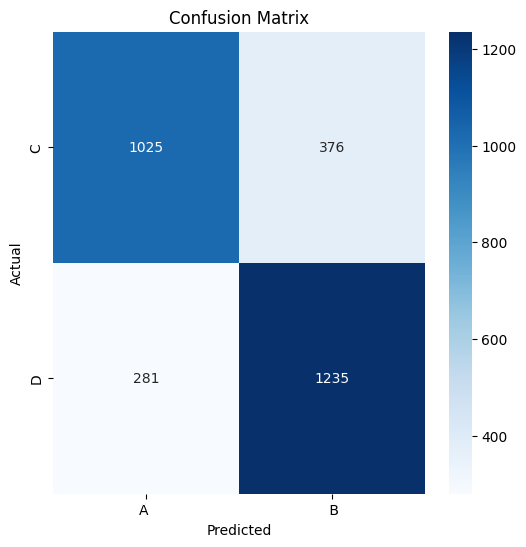

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, linear_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["A "," B"], yticklabels=["C","D"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### HYPERPARAMETER FINETUNING

In [19]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter values to try
param_grid = {
    'C': [0.1, 1, 10, 100],
    'tol': [1e-3, 1e-4, 1e-5],
}

# Create a grid search object
grid_search = GridSearchCV(linear_svm, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the linear SVM model with the best hyperparameters
best_linear_svm = svm.SVC(kernel='linear', **best_params)
best_linear_svm.fit(X_train, y_train)


KeyboardInterrupt: 

#### SAVING THE MODEL IN A FILE

In [ ]:
import joblib
# Save the SVM model to a file
joblib.dump(linear_svm, 'svm_model.joblib')

#### LOADING IT IN A FILE

In [ ]:
import joblib
# Load the SVM model from a file
linear_svm = joblib.load('svm_model.joblib')

In [ ]:
from sklearn.feature_selection import RFE

# Create an RFE object
rfe = RFE(estimator=linear_svm, n_features_to_select=10)
# Fit the RFE object to the training data
rfe.fit(X_train, y_train)
# feature importance scores
feature_importance_scores = rfe.support_

#### FEATURE IMPORTANCE EXTRACTION

In [24]:
from sklearn.inspection import permutation_importance
# Calculate the permutation importance scores
permutation_importance_scores = permutation_importance(linear_svm, X_train, y_train)


#### POST CLASSIFICATION MISCLASSIFIED POINTS

In [ ]:
misclassified_idx = np.where(y_test != linear_predictions)[0]
num_misclassified = len(misclassified_idx)
fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))

misclassified_idx
